## Creacion de un proyecto de machin learnin

En este ejercicio se trabajara a travez de un proyecto de ejemplo de inicio a fin, haciendose pasar por un cientifico de datos recien contratado en una empresa inmobiliaria. Este ejemplo es ficticio; el objetivo es ilustrar los pasos principales de un proyecto de **machine learning**, no es aprender nada acerca de los negocios estatales. Los pasos principales por los que se trabajaran son:

1. Tener una imagen complenta.
2. Obtener los datos.
3. Explorar y visualizar los datos para obtener informacion.
4. Preparar los datos para los algoritmos de machine learning.
5. Seleccionar el modelo y entrenarlo.
6. Afinar y tunear el modelo.
7. Presentar las soluciones
8. Lanzar el modelo y mantener el sistema.


### Ejemplo: Precios de vivienda en California

En este ejmplo se utilizara un dataset de los precios de las viviendas de casas en California del repositorio *StatLib*. Este dataset esta basado en datos del ceso de California en 1990. No son datos recientes pero tienen bastantes cualidades para aprender

#### 1. Vista general

El objetivo es usar los datos del senso California para construir un modelo de precio de vivienda en el estado. Estos datos incluyen metricas como, la poblacion, el ingreso medio, y precio medio de vivienda para cada bloque de grupo en California. Los bloques de grupos son la unidad geografica mas pequeña para la cual la oficina del censo de EE.UU publica datos de muestra (Un grupo suele tener una poblacion de 600 a 3000 personas). Se llamaran *"distritos"* para abreviar. El modelo deberia aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito teniendo en cuenta todas las metricas

**Planteamiento del problema:**  
La primera pregunta que probablemente realizaran es 
- Cual es exactamente el objetivo comercial? 
- Como espera la compañia utilizar y beneficiarse de este modelo?

Construir el modelo probablemente no es el objetivo final. Conocer el objetivo es importante porque determinara como planter el problema, que algoritmos se seleccionaran, que medidas de desempeño se utilizaran para evaluar el model, y que tanto esfuerzo sera dedicado para modificarlo.  
  
El director del proyecto informa que el resultado del modelo sera enviado a otro sistema de aprendizaje automatico, junto con muchas otras señale. Este sistema posterior determinara si vale la pena invertir en un area determinada. Hacer esto es fundamental ya que afecta directamente a los ingresos.  
  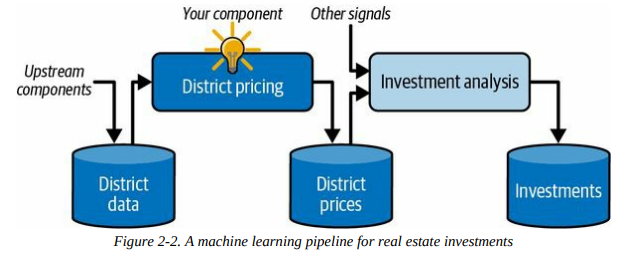
La siguiente pregunta que debe hacerle a su jefe es
- Como es la solucion actual?  

La situacion actual comunmente brindara una referencia de desempeño, asi como tambien ideas de como resolver el problema. Su jefe responde que actualmente los precion de las viviendas en los distritos los calculan manualmente expertos: un equipo recopila informacion actualizada sobre un distrito y cuando no pueden obtener el precio medio de las viviendas, lo estimas utilizando reglas complejas. Esto es costoso y lleva mucho tiempo y sus estimaciones no son muy buenas;en casos cuando lograan averiguar el precio medio real de la vivienda, a menudo se dan cuenta que sus estimaciones equivocadas en mas del 30%. Por  eso la empresa cree que seria util entrenar un modelo para predecir la evolucion de un distrito. Los datos del censo parecen un gran conjunto de datos para explotar con este proposito, ya que incluyen los precios medios de la vivienda de miles de distritos, asi como otros datos.  
  
Con toda esta informacion, usted esta listo para iniciar a diseñanar su sistema. Primero se debe determinar que tipo de modelo de supervision de entrenamiento necesitara el modelo.  

- Aprendizaje supervisado
- Aprendizaje no supervisado
- Aprendizaje semi-supervisado
- Aprendizaje auto-supervisado
- Aprendizaje reforzado
Ademas si se trata de una
- Tarea de clasificacion
- Tarea de regresion
- o algo mas
  
Este ejemplo es claramento una tarea tipica de aprendizaje supervisado, ya que el modelo se puede entrenar con ejemplos etiquetados. Mas especificamente este es un problema de regresion multiple ya que el sistema utilizara multiples caracteristicas para hacer una prediccion. Este tambien un problema de regresion univariable ya que se esta intentando predecir un unico valor para cada distrito. Finalmente hay un flujo no continuo de datos de entrada al sistema, no hay necesidad particular de adaptarse a los ambios rapidos de datos, y los datos son lo suficientemente pequeños como para caber en la memoria, por lo que el aprendizaje por lotes simple deberia funcionar bin.



**Seleccionar la medida de desempeño**  
  
El siguiente paso es seleccionar la medida de desempeño, Una medida tipica para problemas de regresion es la raiz del error cuadrado medio (RMSE *root mean square error*). Esto da una idea de la cantidad de error en un sistema al realizar sus predicciones.
$$RMSE(X,h)=\frac{1}{m}\sum_{i=1}^m [h(x^{(i)})-y^{(i)}]^2$$

* $m$ es el numero de muestras en el dataset que son medidos
* $x(i)$ es un vecto de todas los valores de las caracteristiscas del i-esimo dato, y $y^{i}$ es la etiqueta (Valor deseado o valor de salida para esa instancia)
* $X$ es una matriz que contiene todos los valores de caracteristicas de todas las instancias
* $h$ es la funcion de prediccion, tambien llamada hipotesis.
* RMSE ES LA FUNCION DE COSTO


#### 2) Descargar los datos
En un ambiente tipico sus dato deberian estar disponibles en una base de datos relacionales o algun otro sistema de almacenamiento, extendido a traves de multiples tablas/documentos/archivos. En este proyecto las cosas son mas simples, solo es necesario descargar un archivo comprimido *housing.tgz* el cual contiene una hoja de calculo (CSV).  
  
En lugar de descargar manualmente y descomprimir los dato, usualmente es preferible escribir una funcion que haga esto por ti. Esto es particularmente util si los datos cambian regularmente.

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [4]:
housing = load_housing_data()

Heche una vista rapida de la estructura de datos

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada fila representa un distrito, hay 10 atributos
  
El metod *info()* es util para tener una breve descripcion de los datos, en particular el numero de filas y el tipo de dato de cada atributo, y el numero de valores no nulo

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


hay un total de 20,640, lo que significa que es bastante pequeño segun los estandares del aprendizaje automatico, pero es perfecto para comenzar. Observa que el atributo *total_bedrooms* tiene solo 20433 valores no nulos, lo que significa que a 207 distritos les falta esta caracteristica. Nos encargaremos de esto mas tarde.  
  
Todos los atributos son numericos excepto la proximidad al oceano. Este es un tipo *Object*, entonces podria ser cualquier tipo de objeto. Pero desde que se cargaron los datos del CSV, se sabe que es un atributo de texto. Al observar las primeras 5 filas te pudiste dar cuenta  que los valores en *ocean_proximity* eran repetitivos, lo que significa que es probable que sea un atributo categorico. puedes ecnontrar que categorias existen y cuantos distritos pertenecen a cada categoria utilizando el metodo *value_counts*

In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Otro camino rapido para observar el tipo de datos  que esta tratando de ver es trazar un histograma para cada atributo numerico. Un histograma muestra el numero de instancias (en el eje vertical) que tiene un rango de valores (en el eje horizontal). Tu puedes dibujar los atributos en el tiempo  o llamar el metodo *hist()*

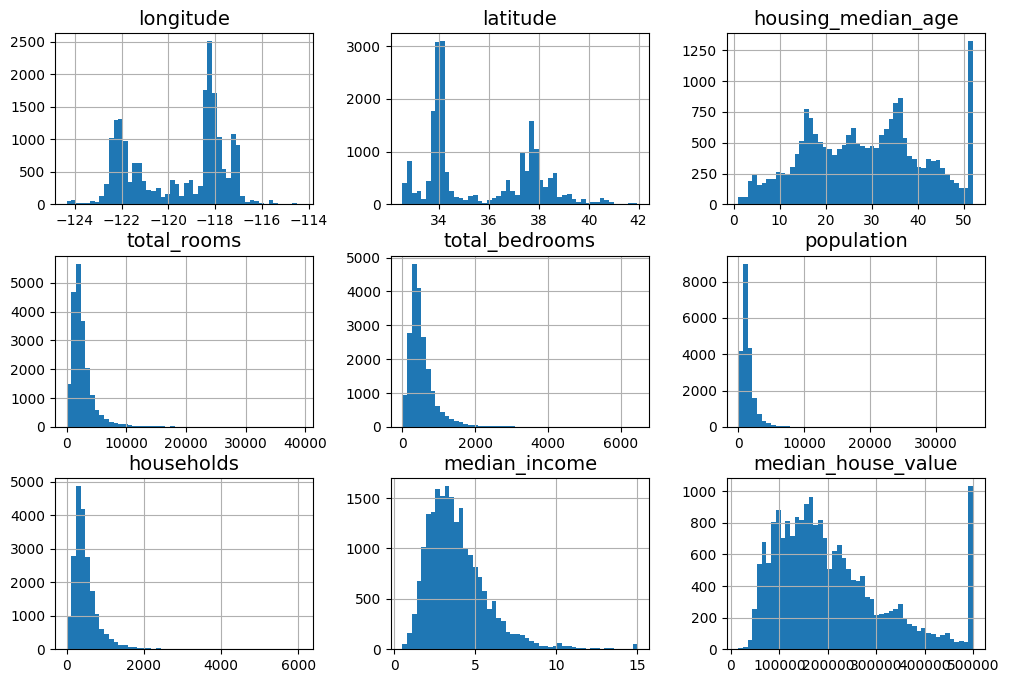

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize=14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

housing.hist(bins = 50, figsize=(12,8))
plt.show()

Observando estos histogramas se puede tener un poco de informacion.

* En primer lugar, el atributo de ingreso medio no parece estar expresado en dolares estadounidenses. Despues de verificar con el equipo que los datos recogidos se han escalado y limitado a 15 por ingresos elevados y a 0.5 para ingresos bajos. Los numeros representan diezmiles de dolares, trabajar con datos preprocesados es comun en machine learning, y esto no es necesariamente un problema, pero deberias intentar entender como se calcularon los datos.
* La edad media de las casas y el valor medio tabien fueron capados. este ultimo puede ser un problema grave ya que es su atributo objetivo. El algoritmo de machine learning pueden aprender que los precios nunca superan ese limite. Es necesario revisar con el equipo si es un problema o no. Si se decide que se necesitan predicciones mas alla de $500.000 entonces se tienen dos opciones:
    - Recolectar etiquetas adecuadas para los distritos cuyas etiquetas fueron limitadas.
    - Remover estos distritos de los datos de entrenamiento y los datos de de prueba si estos superan los $500.000
* Estos atributos tienen diferentes escalas, esto se descibira despues en el escalamiento de datos
* Finalmente, muchos histogramas estan sesgados hacia la derecha: se extienden mucho mas hacia la derecha de la mediana que hacia la izquierda. Esto puede hacer que algunos algoritmos de aprendizaje automatico les resulte un poco mas dificil de  detectar patrones. Mas adelante se mostrara como transformar estos atributos para que tengan distribuciones mas simetricas y en forma de campana
    

**Crear un conjunto de datos de prueba**

> Antes de seguir analizando datos se debe separar un conjunto de datos 

Puede parecer extraño dejar de lado voluntariamente parte de los dats en esta etapa. Despues de todo, solo se ha hecho un vistazo rapido a los datos y seguramente deberias aprender mucho mas sobre ellos antes de decidir que algoritmo usar, pero su cerebro es un sorprendente sistema de deteccion de patrones, lo que tambien significa que es muy propenso al sobreajuste: si observa el conjunto de pruebas, puede toparse con algun patron aparentemente interesante en los datos de la prueba que le lleve a seleccionar un tipo particular de modelo de aprendizaje automatico. Cuando calcule el error de generalizacion utilizando el conjunto de prueba, su estimacion sera demasiado optimista y lanzara un sistema que no funcionara tan bien como se esperaba. Esto se llama sesgo de espionaje de datos.  
  
Crear un conjunto de datos es teoricamente simple. seleccione algunas instancias ramdon tipicamente el 20% del dataset.

In [14]:
import numpy as np

def shuffle_and_split_data(data, test_ratio): # Se crea una funcion con dos datos de entrada
    # data [array]: Datos ingresados para dividir en entrenamiento y en prueba
    # test_ratio [number]: Porcentaje de datos de prueba
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
# Se llama a la funcion para separar los datos
# 80% de datos de entrenamiento
# 20% de datos de pruebas
train_set, test_set = shuffle_and_split_data(housing,0.2) 
print(len(train_set))
print(len(test_set))

16512
4128


Para garantizar que los resultados de este cuaderno sigan siendo los mismos cada vez que lo ejecutamos, debemos configurar la semilla aleatoria:

In [18]:
np.random.seed(42)

Sin embargo, ambas soluciones fallarán la próxima vez que obtenga un conjunto de datos actualizado. Para tener una división estable entre tren y prueba incluso después de actualizar el conjunto de datos, una solución común es usar el identificador de cada instancia para decidir si debe incluirse o no en el conjunto de prueba (asumiendo que las instancias tienen identificadores únicos e inmutables). Por ejemplo, podría calcular un hash del identificador de cada instancia y colocar esa instancia en el conjunto de prueba si el hash es menor o igual al 20% del valor hash máximo. Esto garantiza que el conjunto de pruebas se mantendrá coherente en varias ejecuciones, incluso si actualiza el conjunto de datos. El nuevo conjunto de prueba contendrá el 20 % de las nuevas instancias, pero no contendrá ninguna instancia que estuviera previamente en el conjunto de entrenamiento.

In [19]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Desafortunadamente, el dataset housing no tiene una columna identificadora. La solucion mas simple es utilizar un indice de la fila como el ID

In [23]:
housing_with_id = housing.reset_index() #Se agrega una columna de indice
train_set, test_set = split_data_with_id_hash(housing_with_id,0.2,"index")
print(len(train_set))
print(len(test_set))

16512
4128
